In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import time
import tqdm.notebook as tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pathlib import Path

%matplotlib inline


import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D


In [2]:
IMG_HEIGHT = 137
IMG_WIDTH = 236

In [3]:
PATH = "../data/bengali_centered/new_train_data_with_new_label.csv"

In [4]:
train_df = pd.read_csv(PATH)

In [5]:
train_df.head()

,Unnamed: 0,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,preprocessed_image_path,combined_word
0,0,Train_0,15,9,5,ক্ট্রো,../data/bengali_centered/dataset_1/Train_0.jpg,15095
1,1,Train_1,159,0,0,হ,../data/bengali_centered/dataset_1/Train_1.jpg,159000
2,2,Train_2,22,3,5,খ্রী,../data/bengali_centered/dataset_1/Train_2.jpg,22035
3,3,Train_3,53,2,2,র্টি,../data/bengali_centered/dataset_1/Train_3.jpg,53022
4,4,Train_4,71,9,5,থ্রো,../data/bengali_centered/dataset_1/Train_4.jpg,71095


In [6]:
train_path, test_path, train_root, test_root, train_vowel, test_vowel, train_consonant, test_consonant = train_test_split(
    train_df['preprocessed_image_path'],
    train_df['grapheme_root'],
    train_df['vowel_diacritic'],
    train_df['consonant_diacritic'],
    random_state=42,
    test_size=0.3
)

"""

"""

'\n\n'

In [7]:
train_path

119898    ../data/bengali_centered/dataset_3/Train_11989...
182110    ../data/bengali_centered/dataset_4/Train_18211...
146852    ../data/bengali_centered/dataset_3/Train_14685...
70522     ../data/bengali_centered/dataset_2/Train_70522...
69563     ../data/bengali_centered/dataset_2/Train_69563...
                                ...                        
119879    ../data/bengali_centered/dataset_3/Train_11987...
103694    ../data/bengali_centered/dataset_3/Train_10369...
131932    ../data/bengali_centered/dataset_3/Train_13193...
146867    ../data/bengali_centered/dataset_3/Train_14686...
121958    ../data/bengali_centered/dataset_3/Train_12195...
Name: preprocessed_image_path, Length: 140588, dtype: object

In [8]:
def path_to_img(path_list):
    img_list = list()
    for path in path_list:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.flatten()

        img_list.append(img)
        
    return np.asarray(img_list)
    

In [9]:
import pickle

In [10]:
divide_num = 14

In [11]:
batch_size = len(train_path) // divide_num
scl = StandardScaler()

for idx in tqdm.tqdm(range(divide_num)):
    # 마지막 인덱스가 아닐 때
    if idx != divide_num - 1:
        train_img_list = path_to_img(train_path[batch_size * idx:batch_size * (idx + 1)])
    # 마지막 인덱스 일 때
    else:
        train_img_list = path_to_img(train_path[batch_size * idx:])
    
    scl.fit(train_img_list)
    
    del train_img_list

In [16]:
std = scl.scale_
mean = scl.mean_

parameters = (std, mean)

with open("./standard_scaler_parameters.txt", 'wb') as file:
    pickle.dump(parameters, file)

In [20]:
entire_path_list = train_df['preprocessed_image_path']
divide_num = 20

for idx in tqdm.tqdm(range(divide_num)):
    # 마지막 인덱스가 아닐 때
    if idx != divide_num - 1:
        train_img_list = path_to_img(entire_path_list[batch_size * idx:batch_size * (idx + 1)])
    # 마지막 인덱스 일 때
    else:
        train_img_list = path_to_img(entire_path_list[batch_size * idx:])
    
    scaled_img = scl.transform(train_img_list)
    
    with open(f"./scaled_img_{idx}.pkl", 'wb') as file:
        pickle.dump(scaled_img, file)
    
    del scaled_img, train_img_list

In [23]:
SCALED_IMG_DIR_PATH = "../data/scaled_images"

with open(SCALED_IMG_DIR_PATH + "/scaled_img_0.pkl", "rb") as f:
    scaled_img_list = pickle.load(f)
    
print(scaled_img_list[0].shape)

(32332,)


In [25]:
img = scaled_img_list[0].reshape(IMG_HEIGHT, IMG_WIDTH)

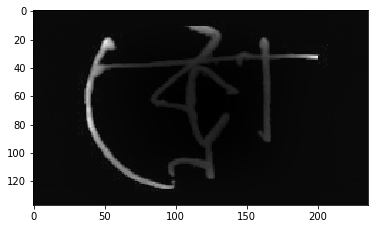

In [26]:
plt.imshow(img, cmap='gray')
plt.show()

In [15]:
divide_num = 14
for idx in tqdm.tqdm(range(divide_num)):
    # 마지막 인덱스가 아닐 때
    if idx != divide_num - 1:
        train_img_list = path_to_img(train_path[batch_size * idx:batch_size * (idx + 1)])
    # 마지막 인덱스 일 때
    else:
        train_img_list = path_to_img(train_path[batch_size * idx:])
    
    scl.fit(train_img_list)
    
    del train_img_list

train_df['preprocessed_image_path']

0            ../data/bengali_centered/dataset_1/Train_0.jpg
1            ../data/bengali_centered/dataset_1/Train_1.jpg
2            ../data/bengali_centered/dataset_1/Train_2.jpg
3            ../data/bengali_centered/dataset_1/Train_3.jpg
4            ../data/bengali_centered/dataset_1/Train_4.jpg
                                ...                        
200835    ../data/bengali_centered/dataset_4/Train_20083...
200836    ../data/bengali_centered/dataset_4/Train_20083...
200837    ../data/bengali_centered/dataset_4/Train_20083...
200838    ../data/bengali_centered/dataset_4/Train_20083...
200839    ../data/bengali_centered/dataset_4/Train_20083...
Name: preprocessed_image_path, Length: 200840, dtype: object

array([0.        , 0.00119498, 0.00089624, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
standard_scaler.fit(train_img_list)

In [ ]:
train_img_list = standard_scaler.fit_transform(train_img_list[:])

In [ ]:
with open('train_img_list.txt', 'wb') as f:
    pickle.dump(train_img_list, f)

In [ ]:
del train_img_list

In [47]:
test_img_list = path_to_img(test_path)

In [ ]:
with open('test_img_list.txt', 'wb') as f:
    pickle.dump(test_img_list, f)

In [ ]:
del test_img_list

In [ ]:
del

In [ ]:
f = "./standardization_parameter.txt"

with open(f, 'rb') as file:
    params = pickle.load(file)

scl = StandardScaler(with_mean=params[1], with_std=params[0])
scl.fit(train_img_list)
std = scl.scale_
mean = scl.mean_

parameters = (std, mean)

with open(f, 'wb') as file:
    pickle.dump(parameters, file)
    


In [ ]:
test_img_list = standard_scaler.transform(test_img_list)

In [ ]:
with open('train_img_list.txt', 'wb') as f:
    pickle.dump(train_img_list, f)

with open('test_img_list.txt', 'wb') as f:
    pickle.dump(test_img_list, f)

In [28]:
tmp = img_list[0].reshape(IMG_HEIGHT, IMG_WIDTH)

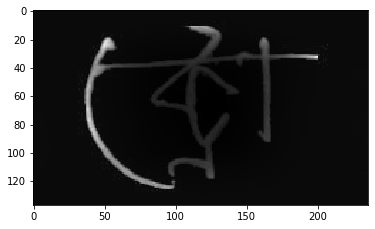

In [29]:
plt.imshow(tmp, cmap='gray')
plt.show()